In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [ ]:

import pandas as pd
import numpy as np
from numpy import where

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.model_selection import cross_val_score


from plotly.subplots import make_subplots
import plotly.graph_objs as go
from collections import Counter


from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings(action='ignore')
from tabulate import tabulate

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier,plot_tree
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier,Pool
import optuna
from optuna.integration import CatBoostPruningCallback
import xgboost as xgb

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [ ]:
from hyperopt import fmin, tpe, hp, rand, Trials, STATUS_OK

In [ ]:
import time

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data = pd.read_csv('second.csv')
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,3,0,0,0,0,95,18,0,0,1,0,0,0,0,0,1
1,0,58,1,0,1,1,87,39,0,0,1,0,0,0,1,0,0
2,1,8,0,0,1,1,110,17,0,0,1,0,0,0,1,0,0
3,1,70,0,0,0,0,69,35,0,1,0,0,0,0,1,0,0
4,1,52,0,0,1,1,77,17,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34607,1,10,0,0,1,1,58,20,0,0,1,0,0,0,0,0,1
34608,1,56,0,0,1,1,213,55,0,1,0,0,1,0,0,0,0
34609,1,82,1,0,1,1,91,28,0,1,0,0,0,0,1,0,0
34610,0,40,0,0,1,1,99,33,0,0,1,0,0,0,1,0,0


## Train-Test Split

In [ ]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [ ]:
y_test

17561    0
30884    0
251      0
30728    0
22327    0
        ..
22524    0
5511     0
26349    0
1266     0
33675    0
Name: stroke, Length: 6923, dtype: int64

In [ ]:
#Общее количество
cou = Counter(y_train)
cou

Counter({0: 27187, 1: 502})

## Масштабирование данных

In [ ]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)



In [ ]:
mean_per_feature = X_train_sc.mean()
print(mean_per_feature)

-1.1627891117096877e-18


In [ ]:
print(len(X_train_sc))
print(len(X_test_sc))

27689
6923


# Балансировка данных при помощи SMOTE

In [ ]:

print("Before Smote, counts of label '1': {}".format(sum(y_train==1)))
print("Before Smote, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
#Функция ravel() в библиотеке NumPy используется для преобразования многомерного массива в одномерный массив.
#Она возвращает новый одномерный массив, содержащий те же элементы, что и исходный массив, но расположенные в одномерной последовательности.
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train.ravel()) # Skailing (здесь мы применяем масштабированные данные)

print('After Smote, the shape of train_X: {}'.format(X_train_smote.shape))
print('After Smote, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After Smote, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After Smote, counts of label '0': {}".format(sum(y_train_smote==0)))

Before Smote, counts of label '1': 502
Before Smote, counts of label '0': 27187 

After Smote, the shape of train_X: (54374, 16)
After Smote, the shape of train_y: (54374,) 

After Smote, counts of label '1': 27187
After Smote, counts of label '0': 27187


## Ансамблевые методы

# SMOTE

## 1.BOOSTING

### КРОСС-ВАЛИДАЦИЯ

In [ ]:

list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,42.997393,0.042300,0.989132,0.990593,0.989132,0.989051
AdaBoostClassifier,3.025200,0.037121,0.818921,0.823043,0.818921,0.818347
XGBClassifier,0.885185,0.016600,0.979605,0.981081,0.979605,0.979527
LGBMClassifier,1.314799,0.016800,0.986244,0.987791,0.986244,0.986158
GradientBoostingClassifier,13.657999,0.013300,0.921581,0.923046,0.921581,0.921508


### Прогнозирование с CatBoostClassifier

**Параметры по умолчанию**

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Fit Time: 6.4186413288 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.00      0.00      0.00       136

    accuracy                           0.98      6923
   macro avg       0.49      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6787    0]
 [ 136    0]]


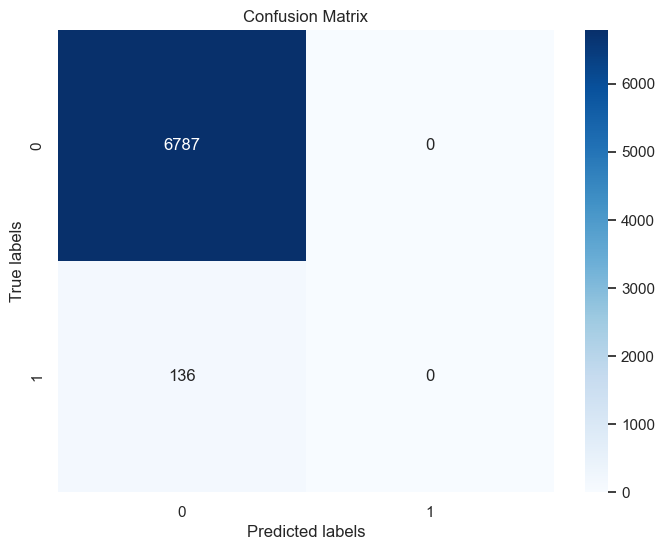

In [ ]:
# Старт времени
start_time = time.time()

# Обучение модели ансамбля
cat_model = CatBoostClassifier(verbose=False,random_state=55).fit(X_train_smote, y_train_smote,plot=True)

# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = cat_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Прогнозирование с LGBMClassifier

Fit Time: 0.2075300217 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.00      0.00      0.00       136

    accuracy                           0.98      6923
   macro avg       0.49      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6787    0]
 [ 136    0]]


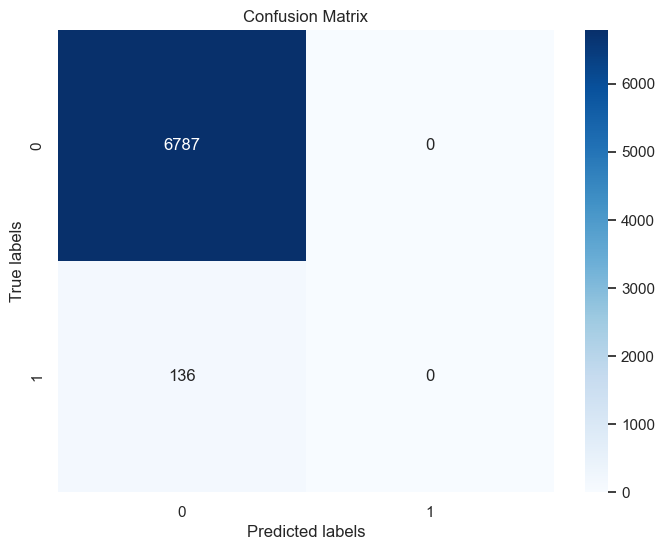

In [ ]:
# Старт времени
start_time = time.time()

# Обучение модели ансамбля
lgbm_model = LGBMClassifier(verbose=-1,random_state=33).fit(X_train_smote, y_train_smote)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = lgbm_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Прогнозирование XGBClassifier

Fit Time: 0.1728 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.41      0.58      6787
           1       0.01      0.43      0.03       136

    accuracy                           0.41      6923
   macro avg       0.49      0.42      0.30      6923
weighted avg       0.95      0.41      0.57      6923

Confusion Matrix:
[[2795 3992]
 [  77   59]]


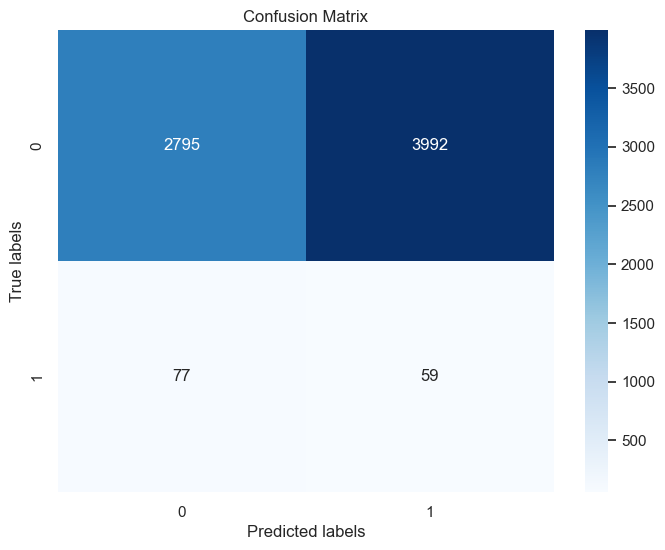

In [ ]:
# Старт времени
start_time = time.time()

# Обучение модели ансамбля
xgb_model = XGBClassifier(random_state=42).fit(X_train_smote, y_train_smote)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")


# Предсказание на тестовой выборке
y_pred = xgb_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### 2.Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Определяем базовые классификаторы (модели)
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# Наименования моделей
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame для хранения резулььтатов
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Оценочные показатели
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Проходим по каждому базовому классификатору, выполняем перекрестную проверку и сохраняем результаты в DataFrame.
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,72.974073,0.906001,0.968791,0.969362,0.968790,0.968781
SVC,344.796825,70.136698,0.861386,0.867458,0.861386,0.860813
DecisionTreeClassifier,3.676515,0.016195,0.984644,0.985649,0.984644,0.984598
KNeighborsClassifier,0.170701,25.024504,0.930813,0.936589,0.930812,0.930582


### Кросс Валидация

In [ ]:
base_classifiers = [
    #RandomForestClassifier(),
    #SVC(),
    ExtraTreesClassifier()
    #DecisionTreeClassifier(),
    #KNeighborsClassifier()
]

list_of_model_names = [type(x).__name__ for x in base_classifiers]

cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=5,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
ExtraTreesClassifier,23.760596,1.959002,0.960808,0.961952,0.960808,0.960784


 ### Прогнозирование с DecisionTreeClassifier

Fit Time: 0.0787 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.00      0.00      0.00       136

    accuracy                           0.98      6923
   macro avg       0.49      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6787    0]
 [ 136    0]]


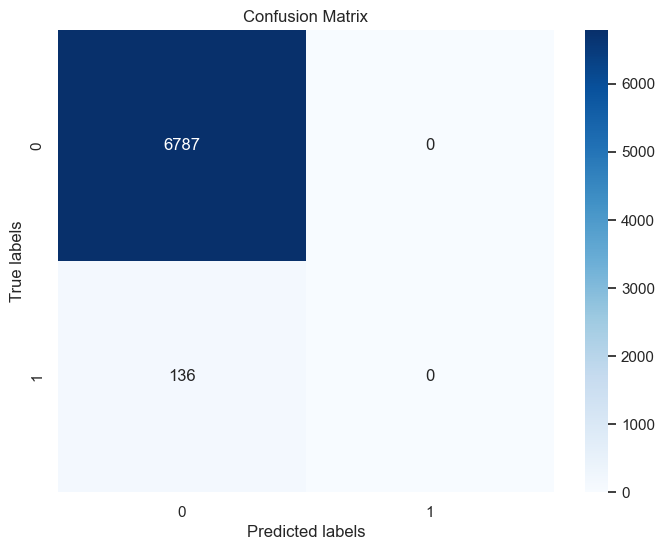

In [ ]:
# Старт времени
start_time = time.time()

# Обучение модели ансамбля
tree_model = DecisionTreeClassifier(random_state=55).fit(X_train_smote, y_train_smote)
# Фиксация времени
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")


# Предсказание на тестовой выборке
y_pred = tree_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()